In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import json
import folium

from sklearn import preprocessing 

import squarify

In [2]:
# !apt_get install -y fonts-nanum > /dev/null
# !fc-cache -fv > /dev/nanum
# !rm -rf ~/.cache/matplotlib > /dev/null


mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

In [3]:
df1 = pd.read_csv('관광지출액/20230508094333_관광소비 히트맵.csv', encoding='cp949')
df2 = pd.read_csv('관광지출액/20230508094333_업종별 지출액.csv', encoding='cp949')
df3 = pd.read_csv('관광지출액/20230508094333_지역별 지출액.csv', encoding='cp949')
df4 = pd.read_csv('관광지출액/20230508094333_관광소비 추이.csv', encoding='cp949')

지역별내국인지출액

업종별 지출액:
숙박업 따로 빼서 분석

관광소비추이: 대분류로 groupby 한후 대분류별 총 지출액 분석
년도별 총(모든대분류) 지출액 분석

In [7]:
df2

,대분류,중분류,대분류 지출액,대분류 지출액 비율,중분류 지출액,중분류 지출액 비율
0,쇼핑업,관광기념품,6.166341e+10,32.9,3.513356e+08,0.6
1,쇼핑업,대형쇼핑몰,6.166341e+10,32.9,4.804665e+10,77.9
2,쇼핑업,레저용품쇼핑,6.166341e+10,32.9,1.104668e+10,17.9
3,쇼핑업,면세점,6.166341e+10,32.9,2.218740e+09,3.6
4,숙박업,기타숙박,7.307243e+09,3.9,3.759804e+09,51.5
5,숙박업,캠핑장/펜션,7.307243e+09,3.9,3.884011e+07,0.5
6,숙박업,콘도,7.307243e+09,3.9,1.035736e+09,14.2
7,숙박업,호텔,7.307243e+09,3.9,2.472863e+09,33.8
8,식음료업,식음료,9.774796e+10,52.1,9.774796e+10,100.0
9,여가서비스업,골프장,1.325986e+10,7.1,8.606732e+09,64.9


In [8]:
df2_accom = df2[(df2['대분류'] == '숙박업')]
df2_accom

,대분류,중분류,대분류 지출액,대분류 지출액 비율,중분류 지출액,중분류 지출액 비율
4,숙박업,기타숙박,7.307243e+09,3.9,3.759804e+09,51.5
5,숙박업,캠핑장/펜션,7.307243e+09,3.9,3.884011e+07,0.5
6,숙박업,콘도,7.307243e+09,3.9,1.035736e+09,14.2
7,숙박업,호텔,7.307243e+09,3.9,2.472863e+09,33.8


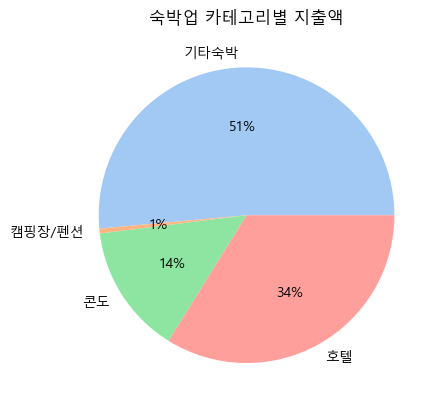

In [9]:
data = df2_accom['중분류 지출액'].tolist()
labels = df2_accom['중분류'].tolist()

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("숙박업 카테고리별 지출액")
plt.show()

In [4]:
df4

,기준년월,광역지자체,대분류,지출액,전년도 지출액
0,2018,전국,관광총소비,4.107603e+10,0.000000e+00
1,2018,전국,호텔,4.917879e+08,0.000000e+00
2,2018,전국,콘도,2.050354e+08,0.000000e+00
3,2018,전국,캠핑장/펜션,4.382556e+06,0.000000e+00
4,2018,전국,기타숙박,8.543274e+08,0.000000e+00
...,...,...,...,...,...
99,2022,전국,골프장,2.209717e+09,1.985028e+09
100,2022,전국,스키장,1.685994e+07,8.593866e+06
101,2022,전국,기타레저,2.801927e+08,2.146110e+08
102,2022,전국,문화서비스,4.741608e+08,2.635746e+08


In [19]:
df4.groupby('기준년월').sum()

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_13008\2992554367.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df4.groupby('기준년월').sum()


,지출액,전년도 지출액
기준년월,,
2018,8.215207e+10,0.000000e+00
2019,8.140220e+10,8.215207e+10
2020,6.508289e+10,8.140220e+10
2021,6.554103e+10,6.508289e+10
2022,8.070468e+10,6.554103e+10


In [18]:
df4.groupby('대분류').sum().sort_values(by='지출액', ascending=False)

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_13008\2774594273.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df4.groupby('대분류').sum().sort_values(by='지출액', ascending=False)


,기준년월,지출액,전년도 지출액
대분류,,,
관광총소비,10100,1.874414e+11,1.470891e+11
식음료,10100,9.774796e+10,7.735645e+10
대형쇼핑몰,10100,4.804665e+10,3.731303e+10
레저용품쇼핑,10100,1.104668e+10,8.885315e+09
골프장,10100,8.606732e+09,6.397015e+09
육상운송,10100,3.905367e+09,2.905941e+09
기타숙박,10100,3.759804e+09,2.980552e+09
호텔,10100,2.472863e+09,1.843762e+09
항공운송,10100,2.293607e+09,1.753759e+09
